# Multiclass Prediction of Obesity Risk

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_score, f1_score

In [ ]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
# Drop the index collums

df.drop('id', axis=1, inplace=True)
test_id = df_test['id']
df_test.drop('id', axis=1, inplace=True)

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df_test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [ ]:
# Mapping the categorical columns into actual numbers

# Quick glanse of the categorical collums that we have in the dataset
print(df.select_dtypes(include=['object']).columns)
print(df_test.select_dtypes(include=['object']).columns)

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')


In [ ]:
# All of the diferent possibilites of the Nobeyesdad column
df["NObeyesdad"].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [ ]:
# Now we map each one of those values to a number in order that the NN can recognize it

NObeyesdad_mapping = {
    'Insufficient_Weight': '0',
    'Normal_Weight': '1',
    'Overweight_Level_I': '2',
    'Overweight_Level_II': '3',
    'Obesity_Type_I': '4',
    'Obesity_Type_II': '5',
    'Obesity_Type_III': '6'
    }

In [ ]:
df['NObeyesdad'] = df['NObeyesdad'].map(NObeyesdad_mapping).astype('int64')

In [ ]:
df['NObeyesdad'].unique()

array([3, 1, 0, 6, 5, 2, 4])

In [ ]:
# We do the same with other categorical colums, that are also in the test dataset:

# MTRANS Column

df['MTRANS'].unique()

array(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike',
       'Bike'], dtype=object)

In [ ]:
# Dummificar

transportation_mapping = {

    'Bike': '0',
    'Walking': '1',
    'Motorbike': '2',
    'Automobile': '3',
    'Public_Transportation': '4',
}

df['MTRANS'] = df['MTRANS'].map(transportation_mapping).astype('int64')
df['MTRANS'].unique()

array([4, 3, 1, 2, 0])

In [ ]:
df_test['MTRANS'] = df_test['MTRANS'].map(transportation_mapping).astype('int64')
df_test['MTRANS'].unique()

array([4, 3, 1, 0, 2])

In [ ]:
# Now with the attribute of CAEC

df['CAEC'].unique()

array(['Sometimes', 'Frequently', 'no', 'Always'], dtype=object)

In [ ]:
df_test['CAEC'].unique()

array(['Sometimes', 'Always', 'Frequently', 'no'], dtype=object)

In [ ]:
frequency_mapping = {
    'no': '1',
    'Sometimes': '0',
    'Frequently': '2',
    'Always': '3'
}

df['CAEC'] = df['CAEC'].map(frequency_mapping).astype('int64')
df_test['CAEC'] = df_test['CAEC'].map(frequency_mapping).astype('int64')
print(df['CAEC'].unique())
print(df_test['CAEC'].unique())

[0 2 1 3]
[0 3 2 1]


In [ ]:
# Now with CALC

df['CALC'].unique()

array(['Sometimes', 'no', 'Frequently'], dtype=object)

In [ ]:
df_test['CALC'].unique()

array(['Sometimes', 'no', 'Frequently', 'Always'], dtype=object)

In [ ]:
# We can use the same map of the last column

df['CALC'] = df['CALC'].map(frequency_mapping).astype('int64')
df_test['CALC'] = df_test['CALC'].map(frequency_mapping).astype('int64')

In [ ]:
# Now we process the other categorical columns that haven't been mapped
categoriacal_columns = df.select_dtypes(include=['object']).columns
categoriacal_columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC'], dtype='object')

In [ ]:
categoriacal_columns_test = df_test.select_dtypes(include=['object']).columns
categoriacal_columns_test

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC'], dtype='object')

In [ ]:
# Since this collums have just two posible answer we can make tha mapping with the get_dummies function

df = pd.get_dummies(df, columns=categoriacal_columns)
df_test = pd.get_dummies(df_test, columns=categoriacal_columns_test)

In [ ]:
df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no',
       'SMOKE_yes', 'SCC_no', 'SCC_yes'],
      dtype='object')

In [ ]:
# Now we have to delete of of the repeated collums

df = df.drop(['Gender_Male', 'family_history_with_overweight_no', 'FAVC_no', 'SMOKE_no', 'SCC_no' ], axis=1)
df_test = df_test.drop(['Gender_Male', 'family_history_with_overweight_no', 'FAVC_no', 'SMOKE_no', 'SCC_no' ], axis=1)

In [ ]:
print(df.columns)
print(df_test.columns)

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'Gender_Female',
       'family_history_with_overweight_yes', 'FAVC_yes', 'SMOKE_yes',
       'SCC_yes'],
      dtype='object')
Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'Gender_Female', 'family_history_with_overweight_yes',
       'FAVC_yes', 'SMOKE_yes', 'SCC_yes'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 20758 non-null  float64
 1   Height                              20758 non-null  float64
 2   Weight                              20758 non-null  float64
 3   FCVC                                20758 non-null  float64
 4   NCP                                 20758 non-null  float64
 5   CAEC                                20758 non-null  int64  
 6   CH2O                                20758 non-null  float64
 7   FAF                                 20758 non-null  float64
 8   TUE                                 20758 non-null  float64
 9   CALC                                20758 non-null  int64  
 10  MTRANS                              20758 non-null  int64  
 11  NObeyesdad                          20758

Here we see that all the columns have been converted into numerical values. Now we can visualize the data in a corre

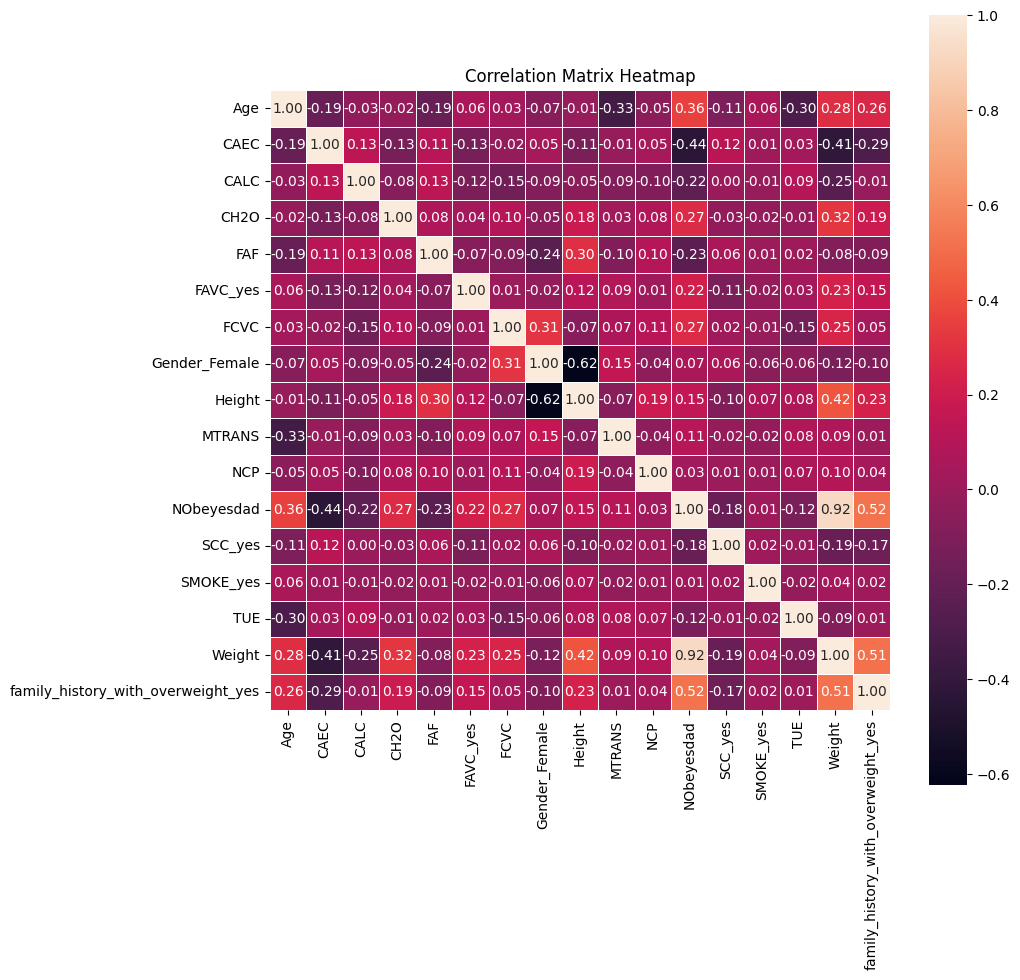

In [ ]:
# Convert all columns in the DataFrame to floats for numerical operations
df = df.astype(float)

# Compute the correlation matrix for the DataFrame
correlation_matrix = df.corr()

# Sort the correlation values for a specific column ('NObeyesdad') in ascending order
sorted_corr = correlation_matrix['NObeyesdad'].sort_index(ascending=True)

# Extract the column names in the order of their correlation with 'NObeyesdad'
ordered_columns = sorted_corr.index

# Create a subset of the correlation matrix based on the ordered columns
focused_corr_matrix = correlation_matrix.loc[ordered_columns, ordered_columns]

# Set up the figure size for the heatmap
plt.figure(figsize=(10, 10))

# Generate the heatmap using Seaborn
sns.heatmap(focused_corr_matrix, annot=True, linewidths=0.5, fmt=".2f", square=True)

# Add a title to the heatmap
plt.title("Correlation Matrix Heatmap")

# Display the heatmap
plt.show()


Now we can start with making the partitions to make the model

In [ ]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(14530, 16)
(6228, 16)
(14530,)
(6228,)


In [ ]:
from xgboost import XGBClassifier

XGB = XGBClassifier(random_state=123)
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)

In [ ]:
y_train_pred = XGB.predict(X_train)
print("Accuracy = ", accuracy_score(y_train, y_train_pred))
print("Kappa = ", cohen_kappa_score(y_train, y_train_pred))
print("Precision = ", precision_score(y_train, y_train_pred, average='micro'))
print("F1-score = ", f1_score(y_train, y_train_pred, average='micro'))

Accuracy =  0.9893324156916724
Kappa =  0.9874880864182757
Precision =  0.9893324156916724
F1-score =  0.9893324156916724


In [ ]:
from sklearn.model_selection import GridSearchCV
clf = XGBClassifier(random_state=123)
parameter_space = {
   'solver': ['lbfgs', 'sgd', 'adam'],
   'activation': ['identity', 'logistic', 'tanh', 'relu']
   }
clf = GridSearchCV(XGB, parameter_space, scoring=cohen_kappa_score, n_jobs=-1, cv=5, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:55:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "activation", "solver" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring=<function cohen_kappa_score at 0x782d247b5750>, verbose=1)

In [ ]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'identity', 'solver': 'lbfgs'}


In [ ]:
y_test_pred=clf.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, y_test_pred))
print("Kappa = ", cohen_kappa_score(y_test, y_test_pred))
print("Precision = ", precision_score(y_test, y_test_pred, average='micro'))
print("F1-score =", f1_score(y_test, y_test_pred, average='micro'))

Accuracy =  0.9044637122671805
Kappa =  0.8879389877343321
Precision =  0.9044637122671805
F1-score = 0.9044637122671805


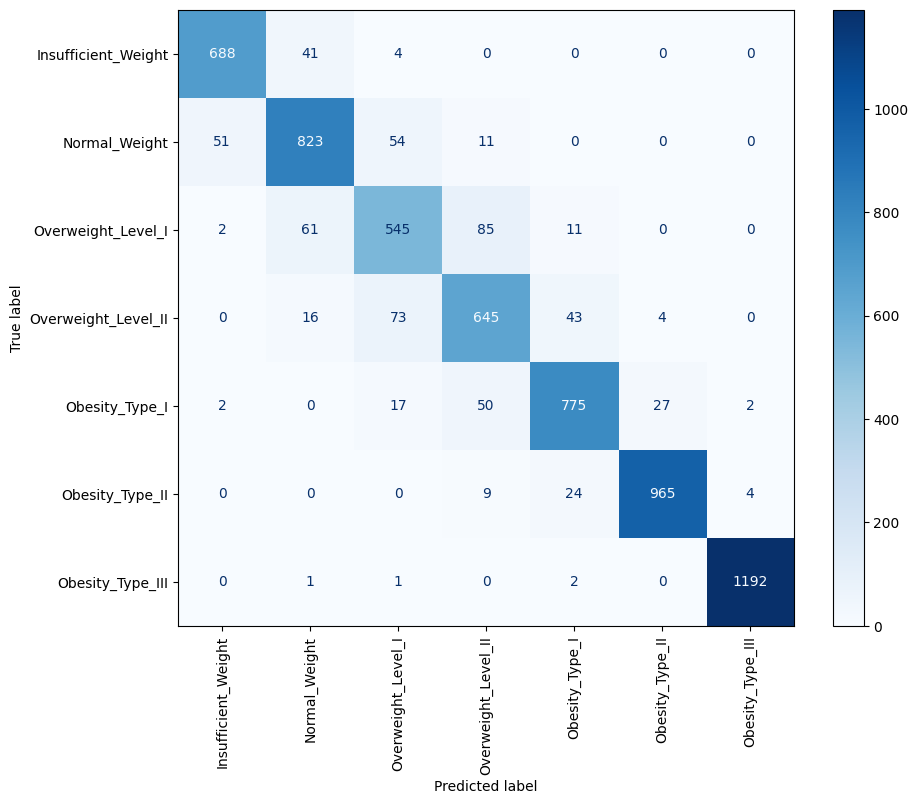

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the labels
labels = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

# Predict on the test set
y_pred = XGB.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Rotate the x-axis labels
ax.set_xticklabels(labels, rotation=90)

# Rotate the y-axis labels (optional, if you want them vertical as well)
ax.set_yticklabels(labels, rotation=0)

plt.show()


In [ ]:
import joblib
joblib.dump(XGB, 'XGB.joblib')

['XGB.joblib']

In [ ]:
loaded_model=joblib.load('XGB.joblib')

In [ ]:
one_row_test = df_test.iloc[0]
one_row_test

,0
Age,26.899886
Height,1.848294
Weight,120.644178
FCVC,2.938616
NCP,3.0
CAEC,0
CH2O,2.825629
FAF,0.8554
TUE,0.0
CALC,0


In [ ]:
type(one_row_test)

pandas.core.series.Series

In [ ]:
loaded_model.predict(one_row_test.values.reshape(1, -1))

array([5])

In [ ]:
import numpy as np

# Datos de ejemplo: una fila con 4 características
one_row_test = np.array([5.1, 3.5, 1.4, 0.2])

# El modelo espera una forma de (n_samples, n_features)
# Aquí, n_samples = 1 (solo una fila), n_features = 4
reshaped_data = one_row_test.reshape(1, -1)

print("Forma después de reshape:", reshaped_data)


Forma después de reshape: [[5.1 3.5 1.4 0.2]]
